In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 15705, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 15705 (delta 9), reused 23 (delta 6), pack-reused 15672
Receiving objects: 100% (15705/15705), 14.44 MiB | 14.10 MiB/s, done.
Resolving deltas: 100% (10755/10755), done.
/kaggle/working/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TpZkzbbCgO5NsBCi1ocI")
project = rf.workspace("iamnova-bwix1").project("dronedataset-n1dlr")
dataset = project.version(1).download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9b73d9a1a6363c1c4bf0d16b9b21564dc0d07ed77b23ef9dbb7f9748dec01d3f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found existing installation

Extracting Dataset Version Zip to dronedataset-1 in yolov5pytorch:: 100%|██████████| 906/906 [00:00<00:00, 2248.53it/s]


In [4]:
!python train.py --img 620 --batch 16 --epochs 200 --data {dataset.location}/data.yaml --weights  yolov5s.pt --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/dronedataset-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=620, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 100 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.10 torch-2.0.

In [23]:
{dataset.location}

{'/kaggle/working/yolov5/dronedataset-1'}

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 620 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov5/dronedataset-1/test/images, data=data/coco128.yaml, imgsz=[620, 620], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [620, 620] must be multiple of max stride 32, updating to [640, 640]
image 1/29 /kaggle/working/yolov5/dronedataset-1/test/images/30017_jpg.rf.325bbaa9d99fd1164c332ae925c6fe7e.jpg: 640x640 8 cars, 1 motorcycle, 1 truck, 13.2ms
image 2/29 /kaggle/working/yolov5/dronedataset-1/test/images/30020_jpg.rf.7

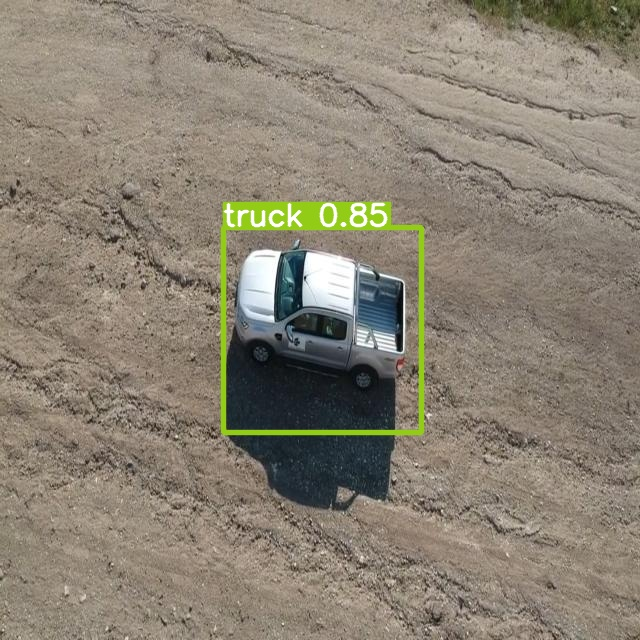

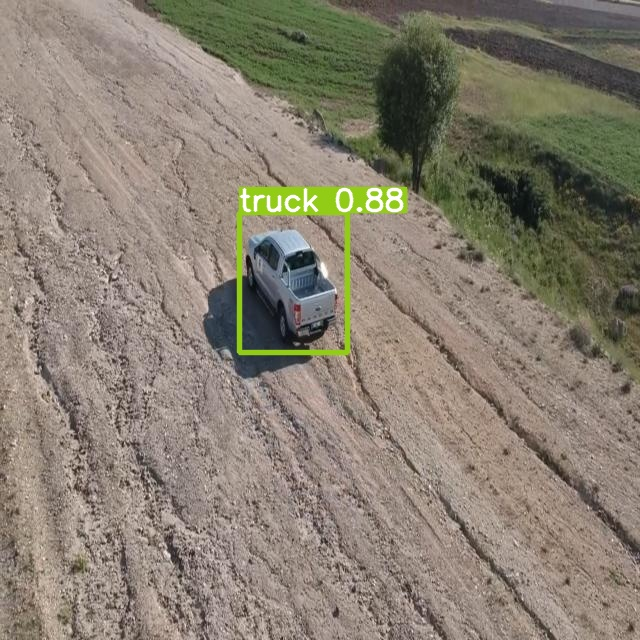

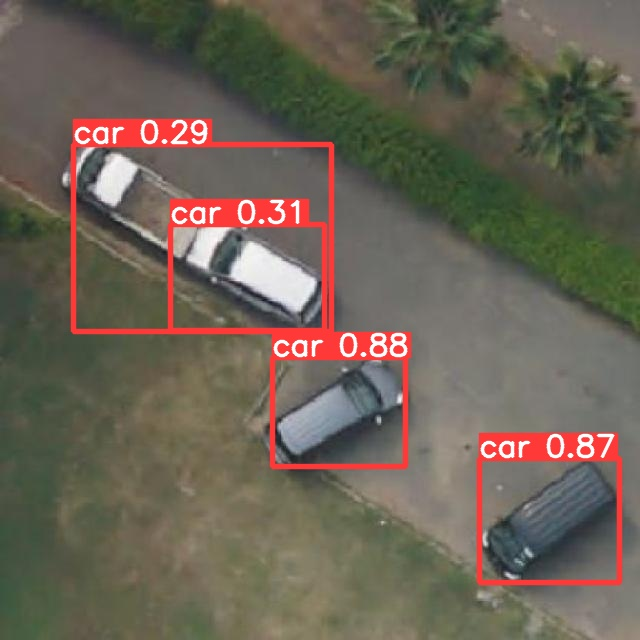

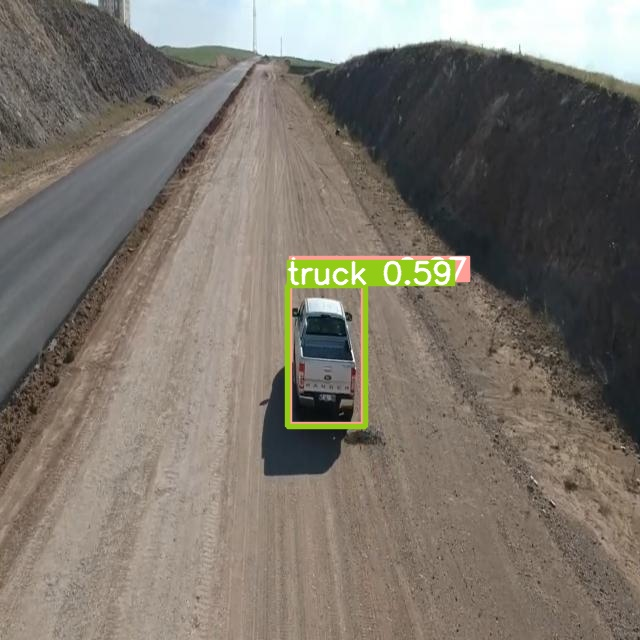

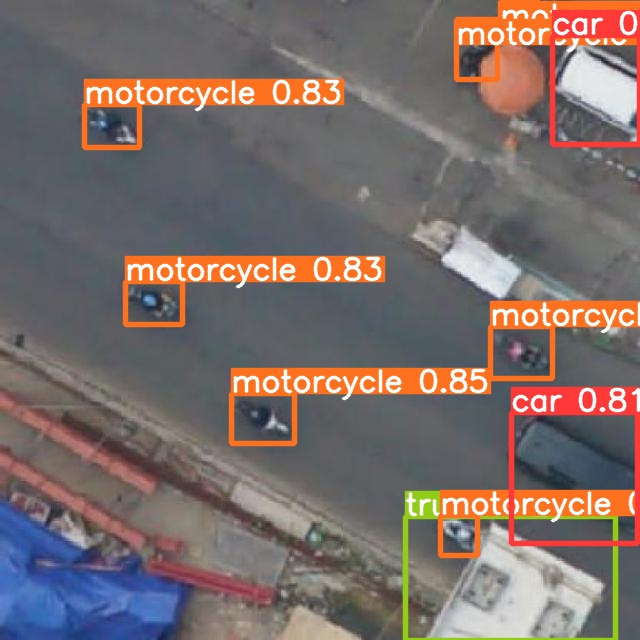

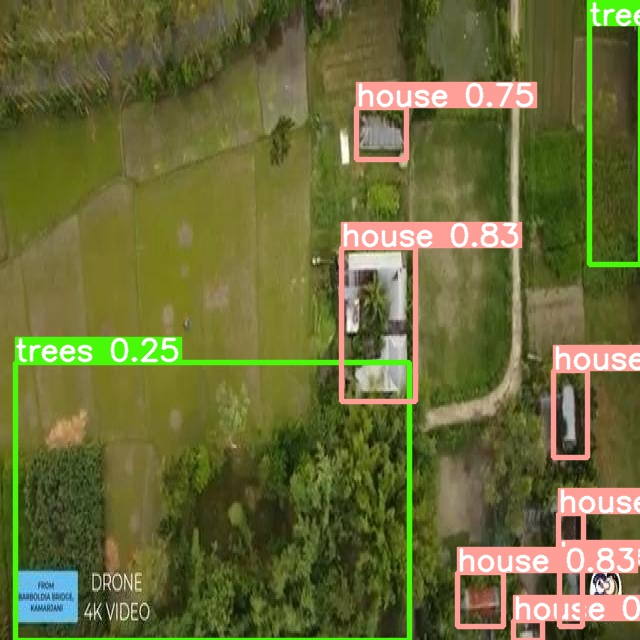

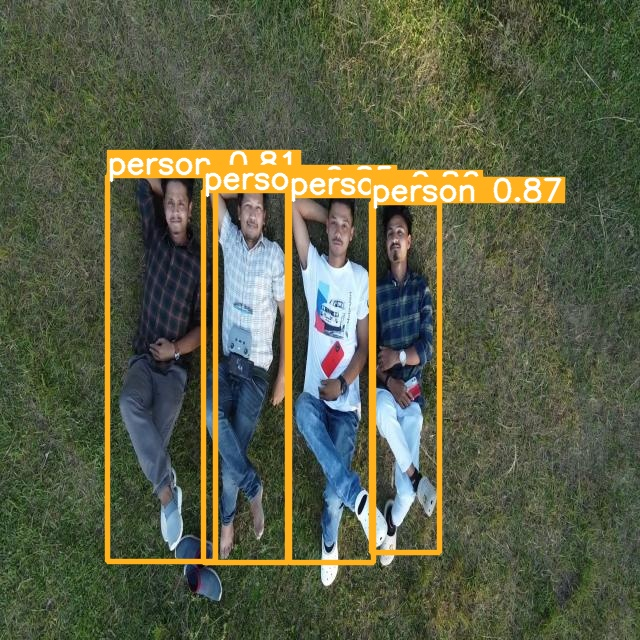

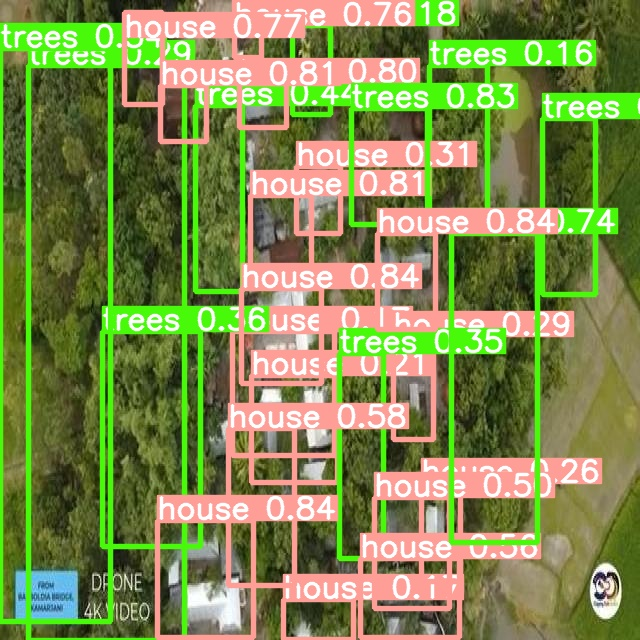

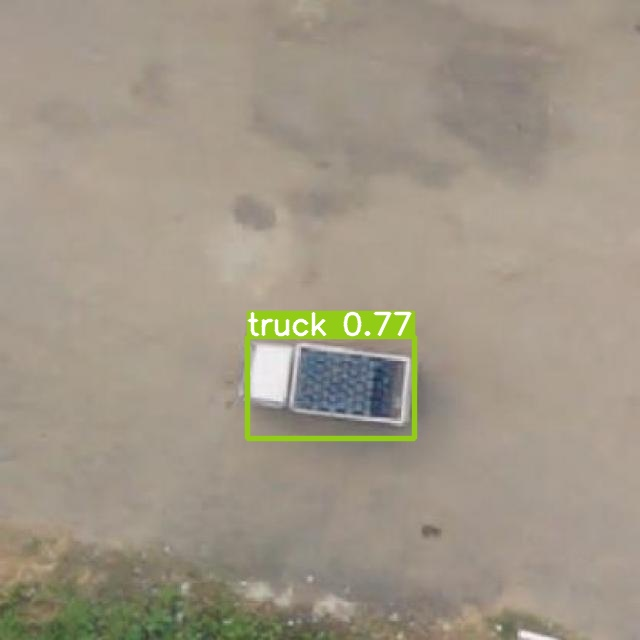

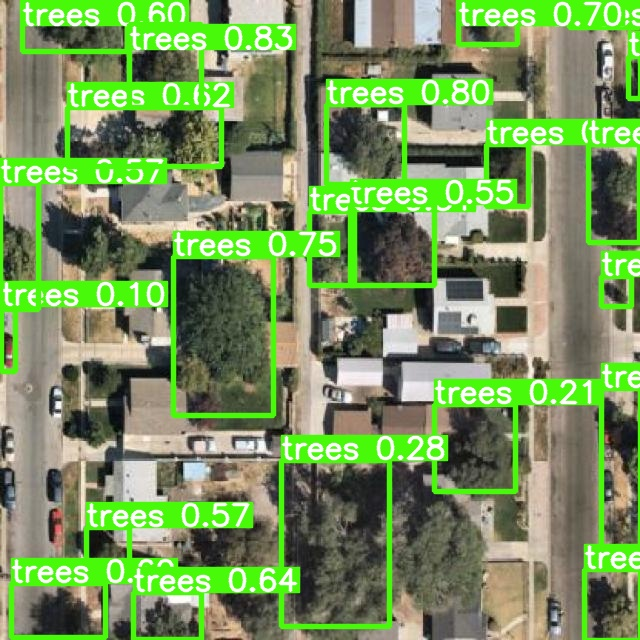

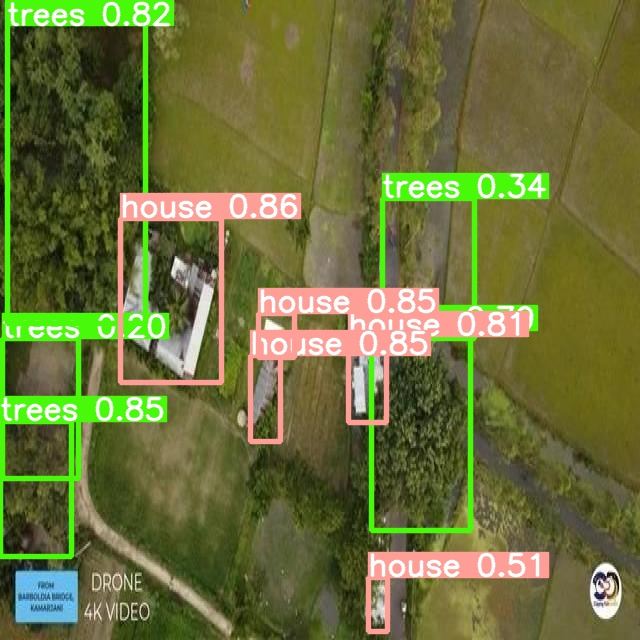

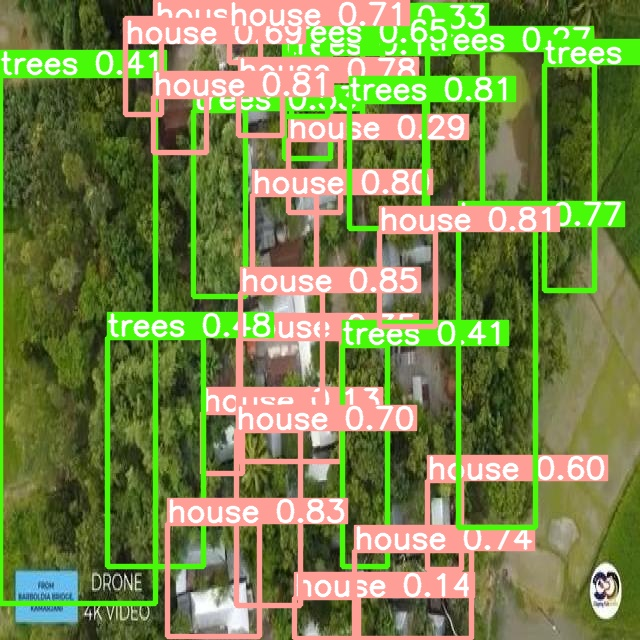

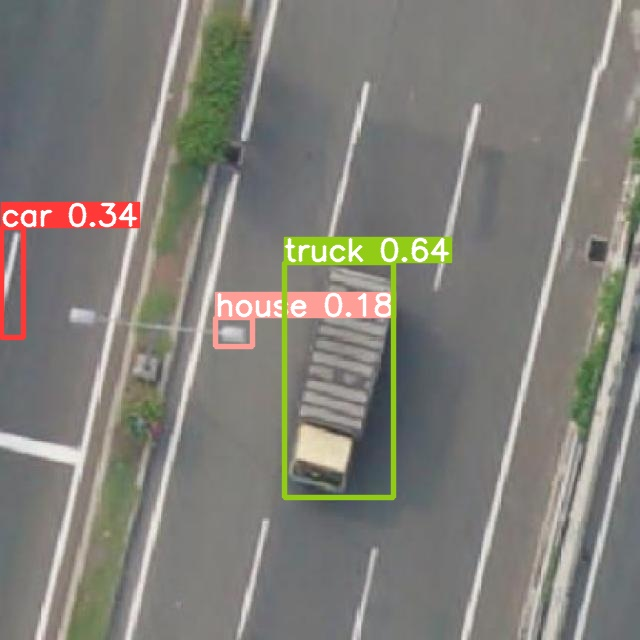

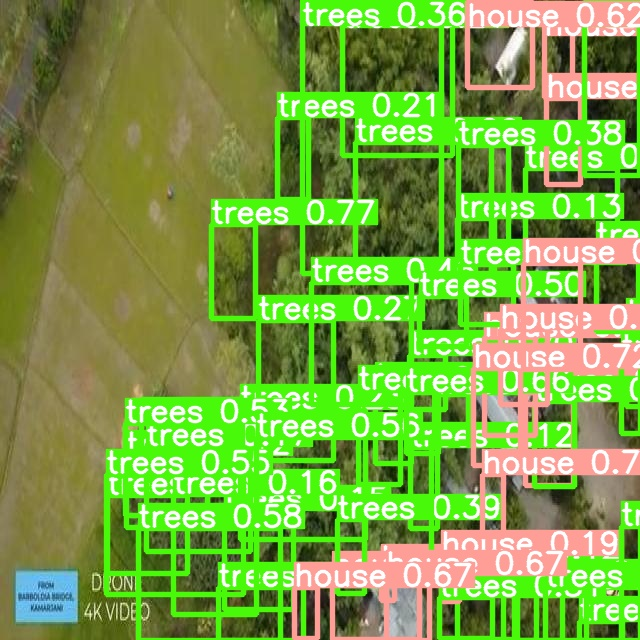

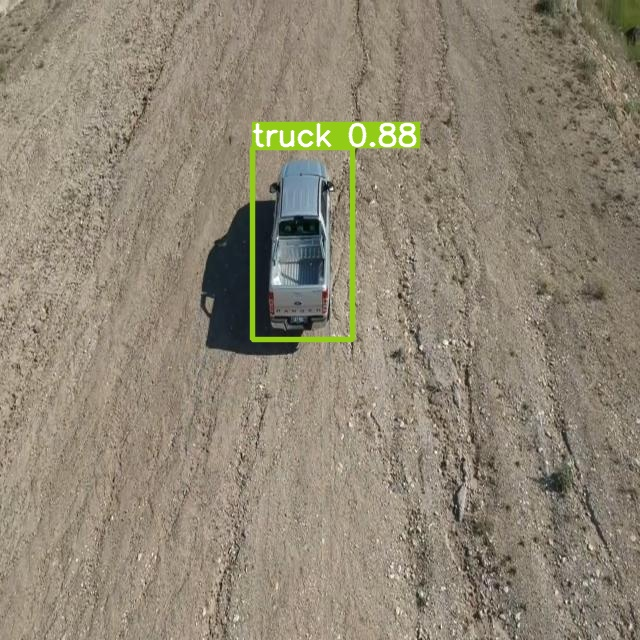

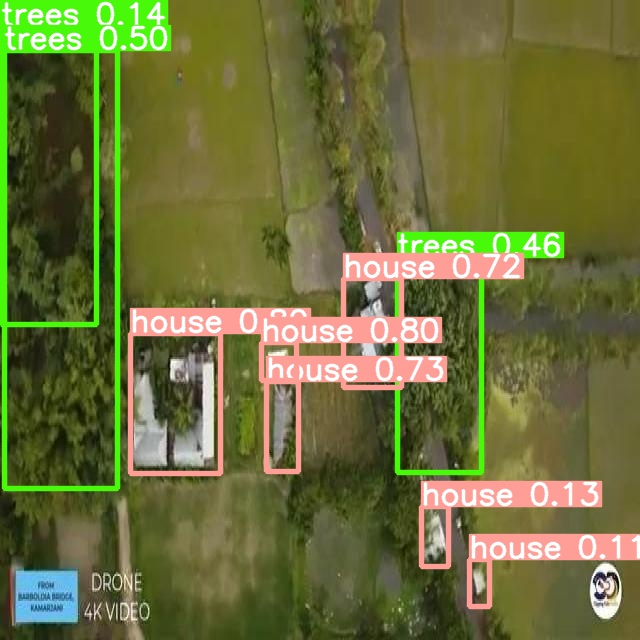

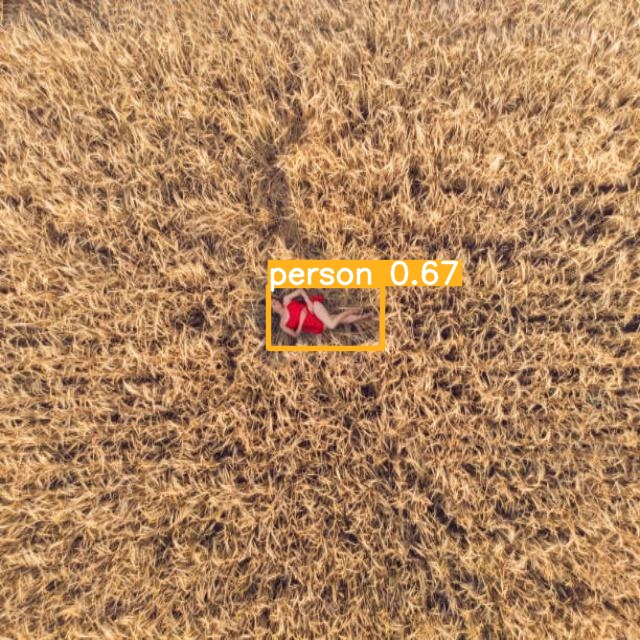

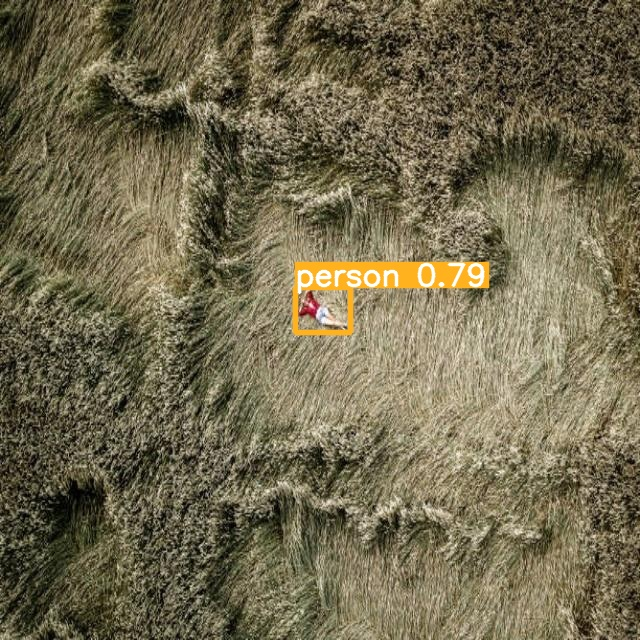

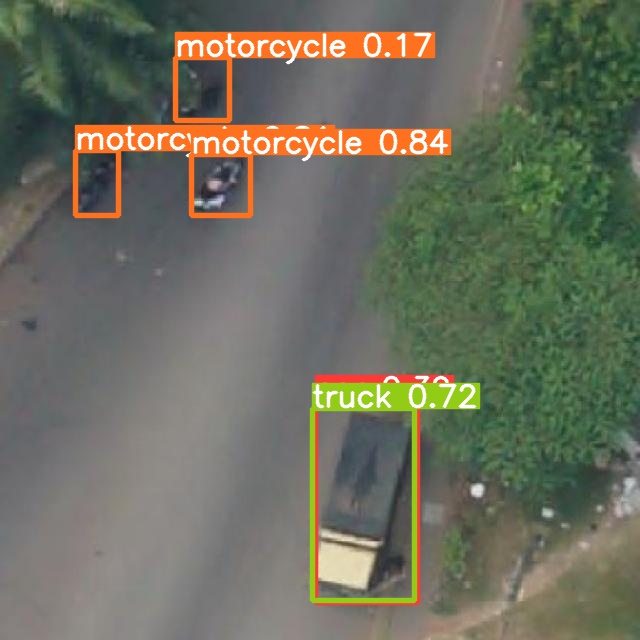

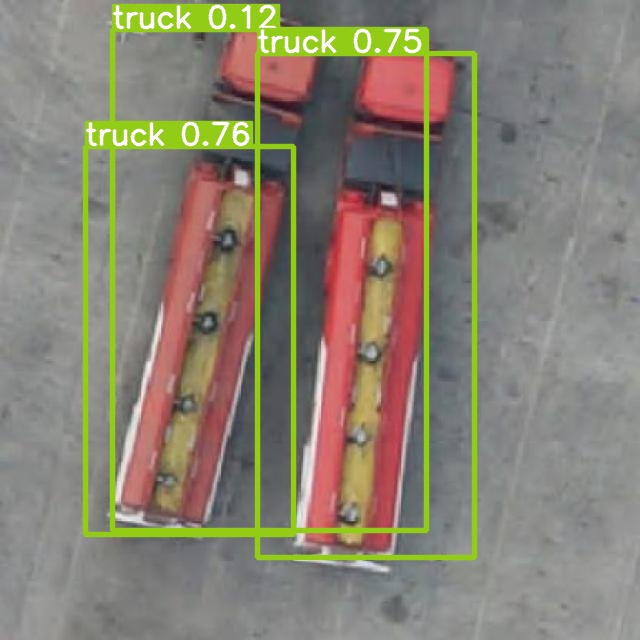

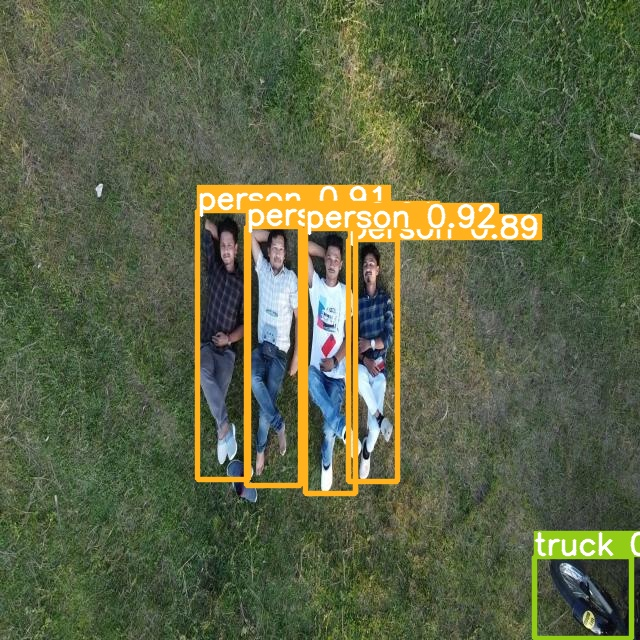

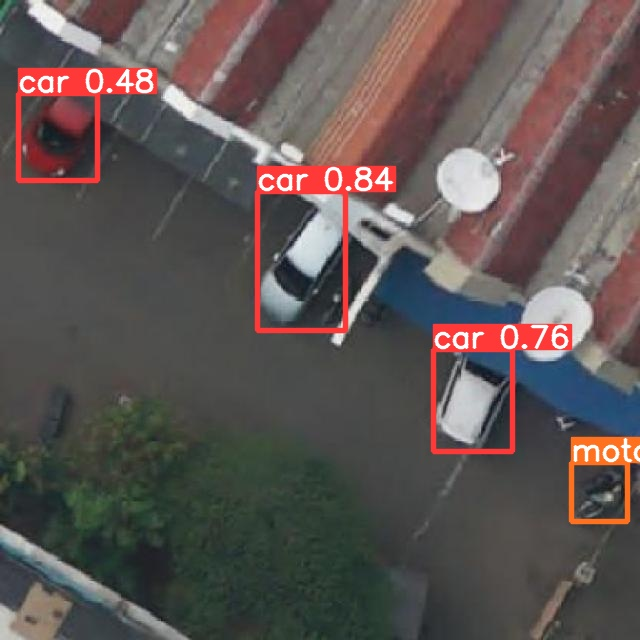

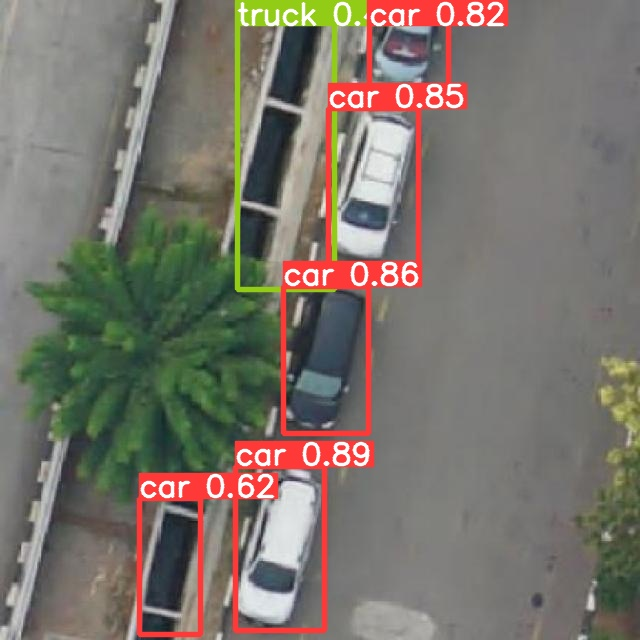

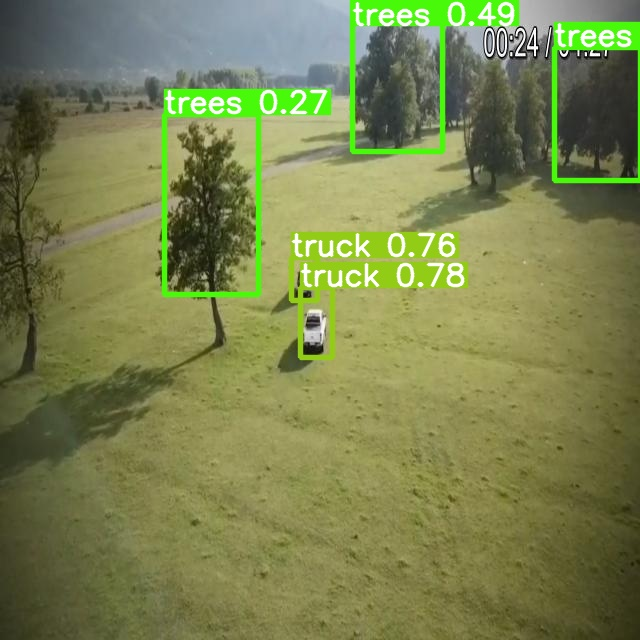

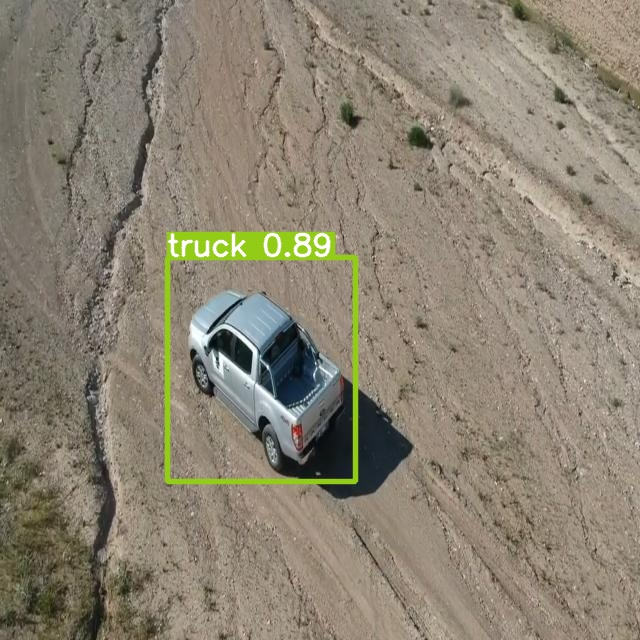

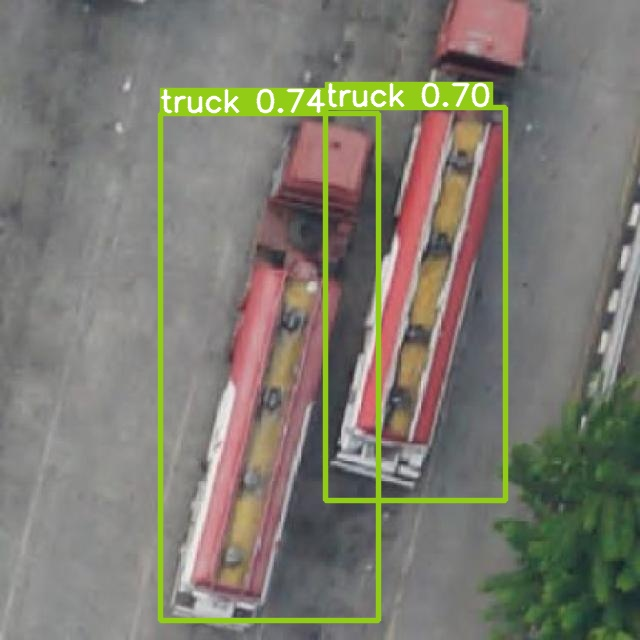

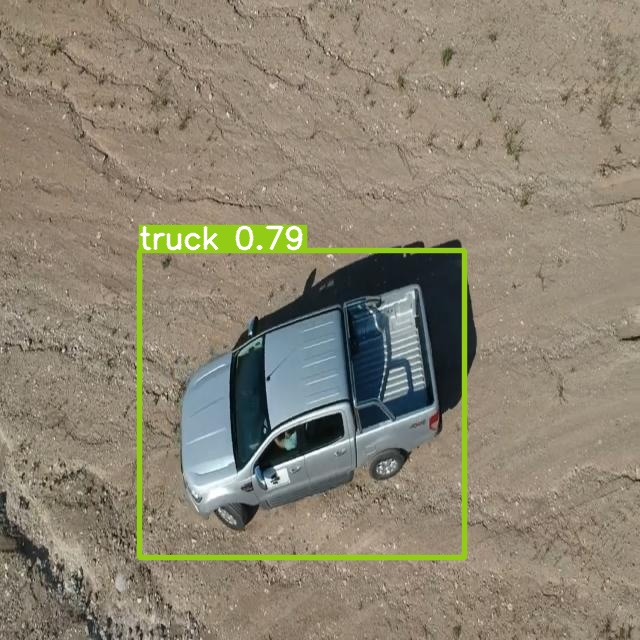

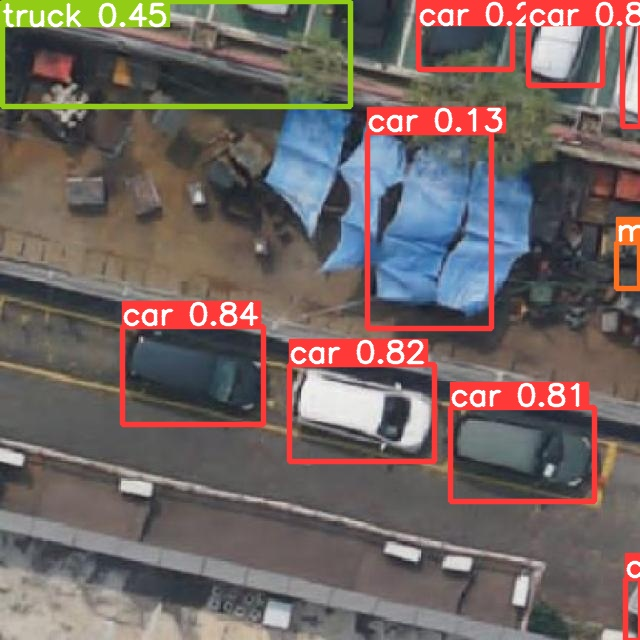

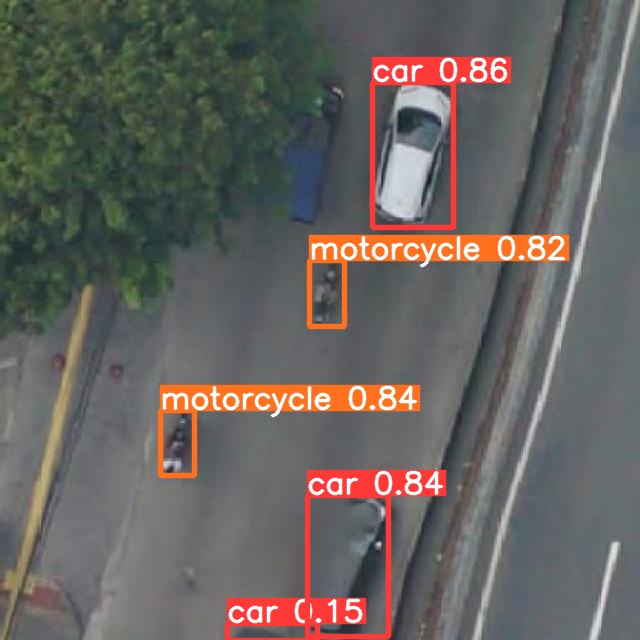

In [9]:
import glob
from IPython.display import Image, display_html

for imageName in glob.glob('/kaggle/working/yolov5/runs/detect/exp/*.jpg'):
    display(Image(filename = imageName))
    print("\n")

> PREDICTION BELLOW

!python detect.py --weights runs/train/exp/weights/best.pt --img 620 --conf 0.1 --source **/kaggle/input/carimg/**

-moi custom image khon hoghlight kora path tut thoisu

In [25]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 620 --conf 0.1 --source /kaggle/input/carimg/

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/input/carimg/, data=data/coco128.yaml, imgsz=[620, 620], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [620, 620] must be multiple of max stride 32, updating to [640, 640]
image 1/1 /kaggle/input/carimg/0000360_07253_d_0000750.jpg: 384x640 11 cars, 1 house, 19 motorcycles, 1 person, 1 trees, 1 truck, 35.5ms
Speed: 0.5ms pre-process, 35.5ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


**Next rsult_image_path tut save thake image**
**aitu code both single image or multiple image t kam koribo**

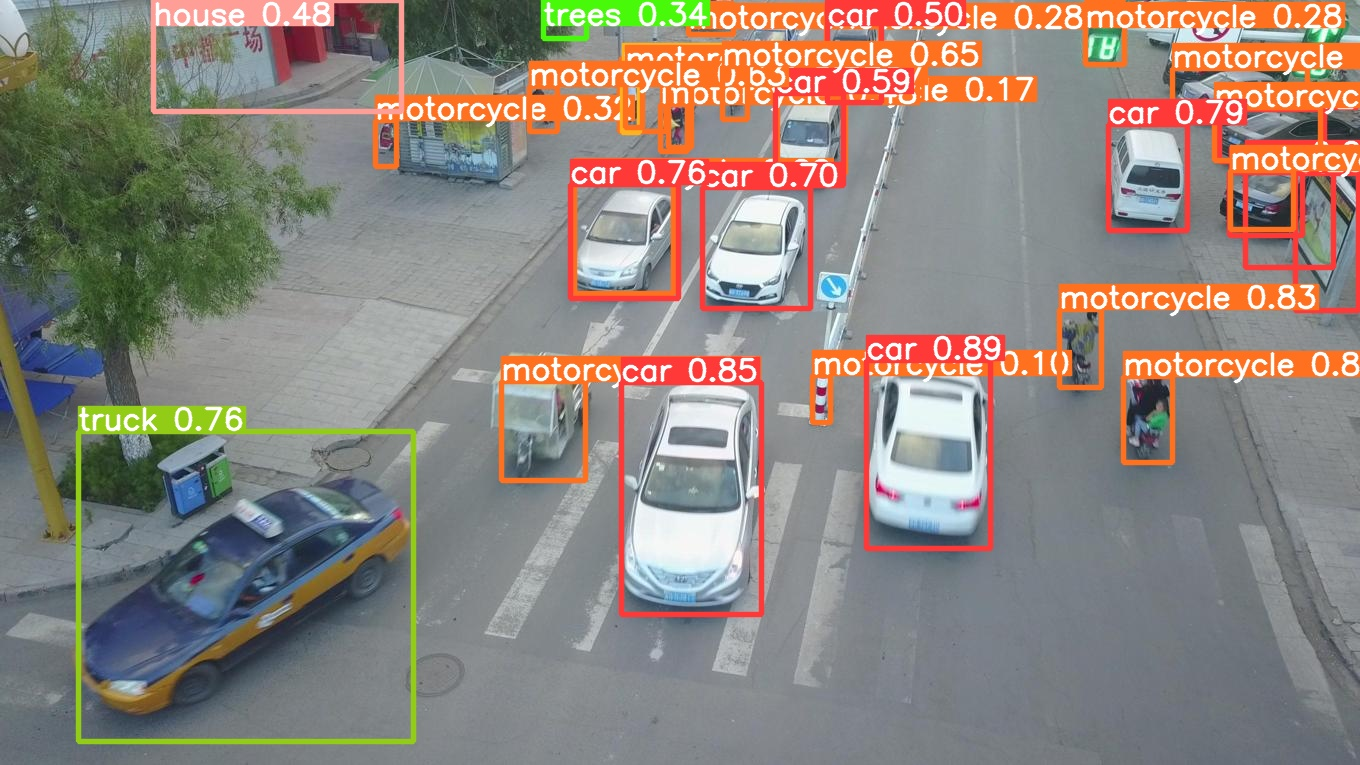

In [39]:
import glob
from IPython.display import Image, display_html
result_image_path = 'runs/detect/exp5/*.jpg'
for imageName in glob.glob(result_image_path):
    display(Image(filename = imageName))
    print("\n")